# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
#importing the Dataset
url = "http://bit.ly/w-data"
data_set = pd.read_csv(url)
print(data_set)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


# Exploring Data Set

In [8]:
data_set.shape

(25, 2)

In [9]:
data_set.dtypes


Hours     float64
Scores      int64
dtype: object

In [10]:
data_set.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [11]:
data_set.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Visualizing the Relation between two Variables

Text(0.5, 1.0, 'Hours Vs Score')

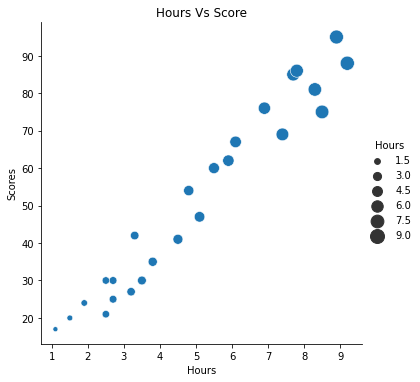

In [4]:
sns.relplot(x="Hours", y="Scores", data= data_set, size= "Hours", sizes= (25, 200))
plt.title("Hours Vs Score")

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

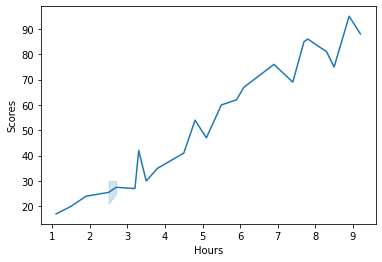

In [5]:
sns.lineplot(x="Hours", y="Scores", data= data_set)


# There is a positive linear relation between the number of hours studied and percentage of score.

# Dividing the data in inputs and outputs

In [9]:
inputs = data_set.iloc[:, :-1].values  
outputs = data_set.iloc[:, 1].values 
print(inputs)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [10]:
print(outputs)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


# Spliting the data into training and test sets

In [11]:
inputs_train, inputs_test, outputs_train, outputs_test= train_test_split(inputs, outputs, test_size=0.2, random_state=0)

In [65]:
#Checking train-test-data shapes
inputs_train.shape, outputs_train.shape

((20, 1), (20,))

In [66]:
inputs_test.shape, outputs_test.shape

((5, 1), (5,))

# Training the Algorithm

In [12]:
regressor = LinearRegression()  
regressor.fit(inputs_train, outputs_train)

LinearRegression()

In [50]:
print(inputs_train)

[[3.8]
 [1.9]
 [7.8]
 [6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]]


# Plotting the Regression Line

In [14]:
regressor.coef_

array([9.91065648])

In [16]:
regressor.intercept_


2.018160041434669

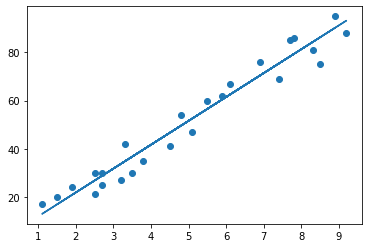

In [17]:
line = regressor.coef_*inputs+regressor.intercept_
plt.scatter(inputs, outputs)
plt.plot(inputs, line);
plt.show()

# Making Predictions

In [51]:
print(inputs_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [53]:
outputs_pred= regressor.predict(inputs_test)
print(outputs_pred)


[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


#These are the Predicted Outputs(Hours) for a given set of Inputs(Scores)


# What will be predicted score if a student study for 9.25 hrs in a
day?

In [63]:
new_hour= 9.25
new_score= regressor.predict([[new_hour]])
print(new_score)

[93.69173249]


# Evaluation of the Model

In [64]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(outputs_test, outputs_pred)) 

Mean Absolute Error: 4.18385989900298


# The End